In [1]:
from __future__ import print_function, division

import torch
torch.manual_seed(0)
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

In [2]:
data_dir = '/Users/arghachakraborty/Projects/CV_assignments/data/train'
def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([
                                       transforms.ToTensor()
                                       ])
    test_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                      ])
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=64)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=64)
    return trainloader, testloader, num_train
trainloader, testloader, num_train_data_set = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)
classes = trainloader.dataset.classes

['next', 'prev', 'stop']


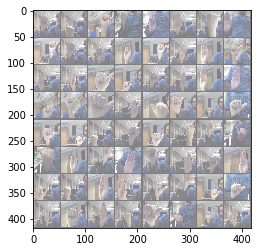

 prev  next  prev


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(3)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 11 * 11, 80)
        self.fc2 = nn.Linear(80, 20)
        self.fc3 = nn.Linear(20, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 11 *11)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#print(c1.shape())


net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1936, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=3, bias=True)
)

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(8):  # loop over the dataset multiple times
    running_loss = 0.0
    #loss_values = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #loss_values.append(running_loss/num_train_data_set)
        if i % 2 == 1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2))
            running_loss = 0.0

print('Finished Training')

[1,     2] loss: 1.097
[1,     4] loss: 1.098
[1,     6] loss: 1.091
[1,     8] loss: 1.093
[1,    10] loss: 1.081
[1,    12] loss: 1.084
[1,    14] loss: 1.085
[1,    16] loss: 1.086
[1,    18] loss: 1.076
[1,    20] loss: 1.093
[1,    22] loss: 1.107
[1,    24] loss: 1.098
[1,    26] loss: 1.084
[1,    28] loss: 1.091
[1,    30] loss: 1.104
[1,    32] loss: 1.091
[1,    34] loss: 1.107
[1,    36] loss: 1.102
[1,    38] loss: 1.083
[1,    40] loss: 1.081
[1,    42] loss: 1.090
[1,    44] loss: 1.092
[1,    46] loss: 1.087
[1,    48] loss: 1.087
[1,    50] loss: 1.086
[1,    52] loss: 1.098
[1,    54] loss: 1.083
[1,    56] loss: 1.081
[1,    58] loss: 1.072
[1,    60] loss: 1.078
[1,    62] loss: 1.085
[1,    64] loss: 1.072
[1,    66] loss: 1.094
[1,    68] loss: 1.081
[1,    70] loss: 1.075
[1,    72] loss: 1.083
[1,    74] loss: 1.078
[1,    76] loss: 1.088
[1,    78] loss: 1.089
[1,    80] loss: 1.068
[1,    82] loss: 1.097
[1,    84] loss: 1.066
[1,    86] loss: 1.074
[1,    88] 

[3,   232] loss: 0.434
[3,   234] loss: 0.469
[3,   236] loss: 0.455
[3,   238] loss: 0.402
[3,   240] loss: 0.474
[3,   242] loss: 0.381
[4,     2] loss: 0.374
[4,     4] loss: 0.475
[4,     6] loss: 0.369
[4,     8] loss: 0.444
[4,    10] loss: 0.365
[4,    12] loss: 0.485
[4,    14] loss: 0.390
[4,    16] loss: 0.437
[4,    18] loss: 0.383
[4,    20] loss: 0.463
[4,    22] loss: 0.288
[4,    24] loss: 0.294
[4,    26] loss: 0.398
[4,    28] loss: 0.389
[4,    30] loss: 0.446
[4,    32] loss: 0.322
[4,    34] loss: 0.372
[4,    36] loss: 0.353
[4,    38] loss: 0.353
[4,    40] loss: 0.388
[4,    42] loss: 0.431
[4,    44] loss: 0.328
[4,    46] loss: 0.310
[4,    48] loss: 0.257
[4,    50] loss: 0.388
[4,    52] loss: 0.226
[4,    54] loss: 0.408
[4,    56] loss: 0.307
[4,    58] loss: 0.297
[4,    60] loss: 0.295
[4,    62] loss: 0.288
[4,    64] loss: 0.281
[4,    66] loss: 0.295
[4,    68] loss: 0.280
[4,    70] loss: 0.343
[4,    72] loss: 0.372
[4,    74] loss: 0.202
[4,    76] 

[6,   220] loss: 0.105
[6,   222] loss: 0.117
[6,   224] loss: 0.194
[6,   226] loss: 0.101
[6,   228] loss: 0.232
[6,   230] loss: 0.103
[6,   232] loss: 0.233
[6,   234] loss: 0.097
[6,   236] loss: 0.173
[6,   238] loss: 0.086
[6,   240] loss: 0.159
[6,   242] loss: 0.097
[7,     2] loss: 0.122
[7,     4] loss: 0.080
[7,     6] loss: 0.092
[7,     8] loss: 0.076
[7,    10] loss: 0.063
[7,    12] loss: 0.109
[7,    14] loss: 0.107
[7,    16] loss: 0.073
[7,    18] loss: 0.179
[7,    20] loss: 0.141
[7,    22] loss: 0.109
[7,    24] loss: 0.169
[7,    26] loss: 0.067
[7,    28] loss: 0.087
[7,    30] loss: 0.069
[7,    32] loss: 0.158
[7,    34] loss: 0.059
[7,    36] loss: 0.083
[7,    38] loss: 0.069
[7,    40] loss: 0.099
[7,    42] loss: 0.108
[7,    44] loss: 0.079
[7,    46] loss: 0.067
[7,    48] loss: 0.095
[7,    50] loss: 0.087
[7,    52] loss: 0.161
[7,    54] loss: 0.135
[7,    56] loss: 0.094
[7,    58] loss: 0.065
[7,    60] loss: 0.060
[7,    62] loss: 0.101
[7,    64] 

In [8]:
PATH = './trained_net.pth'
torch.save(net.state_dict(), PATH)

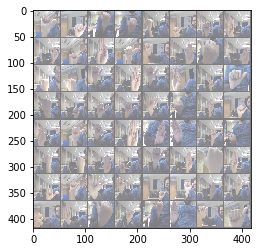

GroundTruth:   prev  prev  next  next


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [11]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [12]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   prev  prev  next  next


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the  test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  test images: 99 %
